https://users.fmrib.ox.ac.uk/~saad/ONBI/ONBI-Fourier_Practical_python.html

### Generate a cosine signal with given magnitude, frequency, sampling rate, and duration:

sampling rate (in this case number of data points per second) => 100  
frequency of the signal (number of cycles per second) => 5

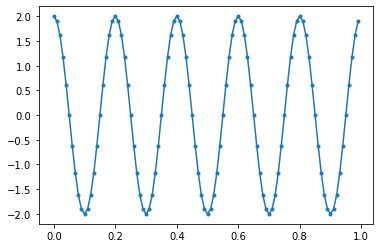

In [23]:
import numpy as np
import matplotlib.pylab as plt

mag  = 2;     # magnitude (arbitrary units)
freq = 5;     # frequency in Hz
samp = 100;   # sampling rate in Hz

t = np.arange(0.0,1.0,1.0/samp)  # time (1s of data)
N = len(t)                       # store the number of time points

x = mag*np.cos(2*np.pi*freq*t)   # the signal equation
plt.plot(t,x,'.-')
plt.show()

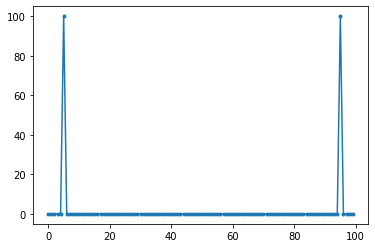

In [3]:
y = np.fft.fft(x);               # do Fast Fourier Transform
f = np.linspace(0.0,N-1.0,N);    # vector of frequencies for plotting

plt.plot(f,np.abs(y),'.-');      # plotting the magnitude of the FFT
plt.show()

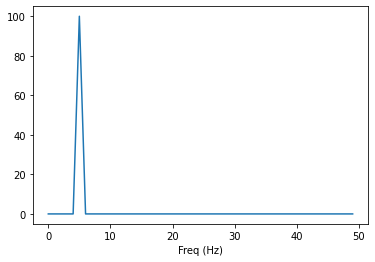

In [4]:
plt.plot(f[:N//2],np.abs(y[:N//2]))   # plotting half of the fft results
plt.xlabel('Freq (Hz)')               # labelling x-axis
plt.show()

If the sampling rate falls below twice the frequency of the signal, the powerspectrum begins to show weird behaviour.   
This is called aliasing, and is explained by the Nyquist theorem.

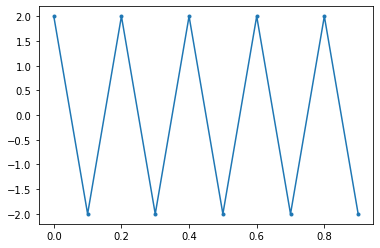

In [6]:
import numpy as np
import matplotlib.pylab as plt

mag  = 2;     # magnitude (arbitrary units)
freq = 5;     # frequency in Hz
samp = 10;   # sampling rate in Hz

t = np.arange(0.0,1.0,1.0/samp)  # time (1s of data)
N = len(t)                       # store the number of time points

x = mag*np.cos(2*np.pi*freq*t)   # the signal equation
plt.plot(t,x,'.-')
plt.show()

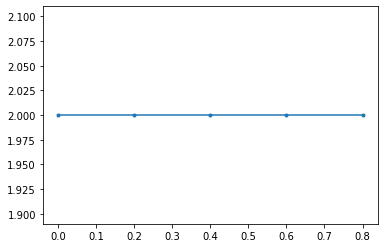

In [24]:
import numpy as np
import matplotlib.pylab as plt

mag  = 2;     # magnitude (arbitrary units)
freq = 5;     # frequency in Hz
samp = 5;   # sampling rate in Hz

t = np.arange(0.0,1.0,1.0/samp)  # time (1s of data)
N = len(t)                       # store the number of time points

x = mag*np.cos(2*np.pi*freq*t)   # the signal equation
plt.plot(t,x,'.-')
plt.show()

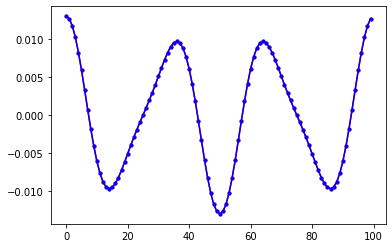

In [12]:
mag    = np.zeros(100)
mag[3] = 1               # spike in the magnitude at freq=3
mag[5] = .3              # spike in the magnitude at freq=5

ph     = np.zeros(100)   # zero phase throughout


y = mag*np.exp(1j*ph)    # the complex signal (fft of some real signal)
x = np.fft.ifft(y)       # the inverse fft (x is in general complex too)
x = np.real(x)           # here we imagine that we can "measure" the real part of x

z = np.fft.ifft(mag)     # here we just use the magnitude to do the ifft
z = np.real(z)

plt.plot(x,'.-r')        # plot the real part of the signal
plt.plot(z,'.-b')        # plot the ifft of the magnitude
plt.show()